In [1]:
## Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving TermDeposit.xlsx to TermDeposit.xlsx


## Importing the necessary Libraries

In [2]:
## Importing all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [3]:
df = pd.read_excel('TermDeposit.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Checking for duplicates and then understanding more information about every parameter
df =  df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [5]:
df = pd.get_dummies(data=df,columns=['job','marital','education'],drop_first=True)
df.tail()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
45206,51,no,825,no,no,cellular,17,nov,977,3,...,0,0,1,0,0,1,0,0,1,0
45207,71,no,1729,no,no,cellular,17,nov,456,2,...,0,0,0,0,0,0,0,0,0,0
45208,72,no,5715,no,no,cellular,17,nov,1127,5,...,0,0,0,0,0,1,0,1,0,0
45209,57,no,668,no,no,telephone,17,nov,508,4,...,0,0,0,0,0,1,0,1,0,0
45210,37,no,2971,no,no,cellular,17,nov,361,2,...,0,0,0,0,0,1,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   contact              45211 non-null  object
 6   day                  45211 non-null  int64 
 7   month                45211 non-null  object
 8   duration             45211 non-null  int64 
 9   campaign             45211 non-null  int64 
 10  pdays                45211 non-null  int64 
 11  previous             45211 non-null  int64 
 12  poutcome             45211 non-null  object
 13  y                    45211 non-null  object
 14  job_blue-collar      45211 non-null  uint8 
 15  job_entrepreneur     45211 non-null  uint8 
 16  job_

In [7]:
df[['default','housing','loan']] = df[['default','housing','loan']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   default              45211 non-null  category
 2   balance              45211 non-null  int64   
 3   housing              45211 non-null  category
 4   loan                 45211 non-null  category
 5   contact              45211 non-null  object  
 6   day                  45211 non-null  int64   
 7   month                45211 non-null  object  
 8   duration             45211 non-null  int64   
 9   campaign             45211 non-null  int64   
 10  pdays                45211 non-null  int64   
 11  previous             45211 non-null  int64   
 12  poutcome             45211 non-null  object  
 13  y                    45211 non-null  object  
 14  job_blue-collar      45211 non-null  uint8   
 15  job_entrepreneur   

In [8]:
df['loan'] = df['loan'].cat.codes
df['housing'] = df['housing'].cat.codes
df['default'] = df['default'].cat.codes
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,unknown,5,may,261,1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,unknown,5,may,151,1,...,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,unknown,5,may,76,1,...,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,unknown,5,may,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,unknown,5,may,198,1,...,0,0,0,0,1,0,1,0,0,1


In [9]:
# Dropping Contact since it has ~30% missing data
df = df.drop(['contact'],axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  int8  
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  int8  
 4   loan                 45211 non-null  int8  
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  poutcome             45211 non-null  object
 12  y                    45211 non-null  object
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [10]:
# Changing the datatype of Y to integer since it is object variable

df['y'] = df['y'].astype('category')
df['y'] = df['y'].cat.codes
df['y'] = df['y'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  int8  
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  int8  
 4   loan                 45211 non-null  int8  
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  poutcome             45211 non-null  object
 12  y                    45211 non-null  int64 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [11]:
df.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,may,151,1,-1,...,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,5,may,76,1,-1,...,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,0,0,1,0,1,0,0,1
5,35,0,231,1,0,5,may,139,1,-1,...,0,0,0,0,0,1,0,0,1,0
6,28,0,447,1,1,5,may,217,1,-1,...,0,0,0,0,0,0,1,0,1,0
7,42,1,2,1,0,5,may,380,1,-1,...,0,0,0,0,0,0,0,0,1,0
8,58,0,121,1,0,5,may,50,1,-1,...,0,0,0,0,0,1,0,0,0,0
9,43,0,593,1,0,5,may,55,1,-1,...,0,0,1,0,0,0,1,1,0,0


In [12]:
d = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug': 8, 'sep':9, 'oct': 10,'nov':11, 'dec':12}
df.month = df.month.map(d)

In [13]:
df.head(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,1,0,1,0,0,1


# Splitting the data into 2 parts based on the particpation in previous campaign :
1) For people from the previous campaign

2) For people to whom this is the first campaign

This is done since 81% of people are new to the campaign and the rest 19% only were part of previous campaigns (Skewness in the data)

In [145]:
# Dataset of 1st time campaign participants

curr_camp = df.loc[df.pdays == -1]
curr_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,1,0,1,0,0,1


In [146]:
# Dropping pdays, previous and poutcome since it is irrelevant for first time campaign participants

curr_camp = curr_camp.drop(['pdays','previous','poutcome'],axis = 1)
curr_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,0,...,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,5,5,76,1,0,...,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,1,0,1,0,0,1


In [147]:
# Dataset of previous campaign participants

prev_camp = df.loc[df.pdays != -1]
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,882,0,0,21,10,39,1,151,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,-247,1,1,21,10,519,1,166,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,3444,1,0,21,10,144,1,91,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,2415,1,0,22,10,73,1,86,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,0,1,0,23,10,140,1,143,...,0,0,0,0,0,1,0,0,1,0


# EDA for 1st Time Campaign Participants

In [148]:
curr_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,0,...,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,5,5,76,1,0,...,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,1,0,1,0,0,1


<Axes: ylabel='balance'>

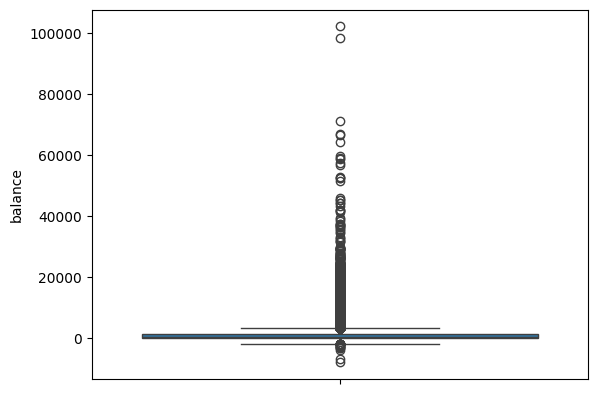

In [149]:
sns.boxplot(data = curr_camp, y = curr_camp['balance'])

In [150]:
# Understanding the outliers in terms of their Bank Balance

Q1 = curr_camp['balance'].quantile(0.25)
Q3 = curr_camp['balance'].quantile(0.75)

IQR = Q3 - Q1

Lower_Limit = Q1 -1.5*IQR
Upper_Limit = Q3 +1.5*IQR

print(f"Q1 is {Q1}, Q3 is {Q3}, Lower_Limit is {Lower_Limit}, Upper_Limit is {Upper_Limit}")

Q1 is 55.0, Q3 is 1358.0, Lower_Limit is -1899.5, Upper_Limit is 3312.5


In [ ]:
Outlier_count = curr_camp[curr_camp['balance']>3312.5].shape[0]

Outlier_perc = Outlier_count/len(curr_camp)

print(f'Outlier_count is {Outlier_count} |  Outlier_perc is {Outlier_perc}')

Outlier_count is 3927 |  Outlier_perc is 0.10626725117713914


In [151]:
curr_camp['balance'] = pd.cut(curr_camp['balance'], bins =[-100,55,100,414,1360,3400],
                              labels=['Very Low Balance','Low_Balance','Moderate_Balance','High_Balance','Very_High_Balance'])
curr_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,Very_High_Balance,1,0,5,5,261,1,0,...,0,0,0,0,0,1,0,0,1,0
1,44,0,Very Low Balance,1,0,5,5,151,1,0,...,0,0,1,0,0,0,1,1,0,0
2,33,0,Very Low Balance,1,1,5,5,76,1,0,...,0,0,0,0,0,1,0,1,0,0
3,47,0,Very_High_Balance,1,0,5,5,92,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,Very Low Balance,0,0,5,5,198,1,0,...,0,0,0,0,1,0,1,0,0,1


In [152]:
curr_camp['balance'] = curr_camp['balance'].map({'Very Low Balance': 1, 'Low_Balance':2,'Moderate_Balance':3,'High_Balance':4,'Very_High_Balance':5})
curr_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,5,1,0,5,5,261,1,0,...,0,0,0,0,0,1,0,0,1,0
1,44,0,1,1,0,5,5,151,1,0,...,0,0,1,0,0,0,1,1,0,0
2,33,0,1,1,1,5,5,76,1,0,...,0,0,0,0,0,1,0,1,0,0
3,47,0,5,1,0,5,5,92,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,1,0,1,0,0,1


<Axes: ylabel='duration'>

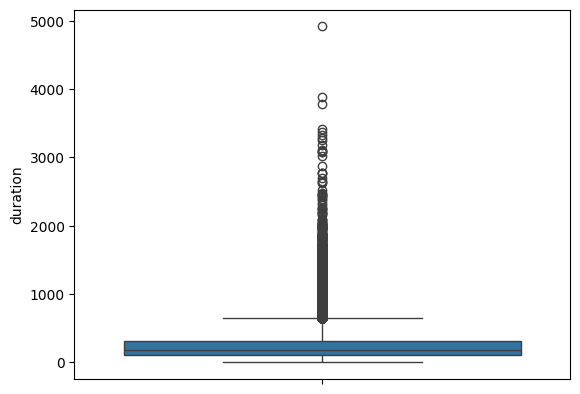

In [153]:
sns.boxplot(data = curr_camp, y = curr_camp['duration'])


In [ ]:
# Understanding the outliers in terms of their Duration of last call

Q1 = curr_camp['duration'].quantile(0.25)
Q3 = curr_camp['duration'].quantile(0.75)

IQR = Q3 - Q1

Lower_Limit = Q1 -1.5*IQR
Upper_Limit = Q3 +1.5*IQR

print(f"Q1 is {Q1}, Q3 is {Q3}, Lower_Limit is {Lower_Limit}, Upper_Limit is {Upper_Limit}")

Q1 is 101.0, Q3 is 318.0, Lower_Limit is -224.5, Upper_Limit is 643.5


In [ ]:
Outlier_count = curr_camp[curr_camp['duration']>643.5].shape[0]

Outlier_perc = Outlier_count/len(curr_camp)

print(f'Outlier_count is {Outlier_count} |  Outlier_perc is {Outlier_perc}')

Outlier_count is 2705 |  Outlier_perc is 0.07319911241002328


In [154]:
curr_camp['duration'] = pd.cut(curr_camp['duration'], bins =[-225,101,178,318,643.5,5000],labels=['Very_short_call','Short_Call','Normal_Call','Fairly_long_Call','Very_long_Call'])
curr_camp['duration'] = curr_camp['duration'].map({'Very_long_Call':5, 'Fairly_long_Call':4,'Normal_Call':3,'Short_Call':2, 'Very_short_call':1})
curr_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,5,1,0,5,5,3,1,0,...,0,0,0,0,0,1,0,0,1,0
1,44,0,1,1,0,5,5,2,1,0,...,0,0,1,0,0,0,1,1,0,0
2,33,0,1,1,1,5,5,1,1,0,...,0,0,0,0,0,1,0,1,0,0
3,47,0,5,1,0,5,5,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,3,1,0,...,0,0,0,0,1,0,1,0,0,1


[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across different yearly balance holders')]

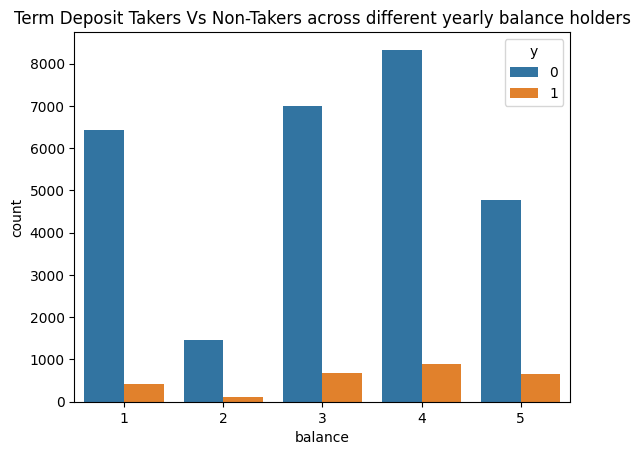

In [155]:
sns.countplot(data=curr_camp, x = 'balance', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across different yearly balance holders")

# We can interpret that in terms of percentage, customers with Very High Balance are opting for Term Deposits compared to other groups

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across different call duration')]

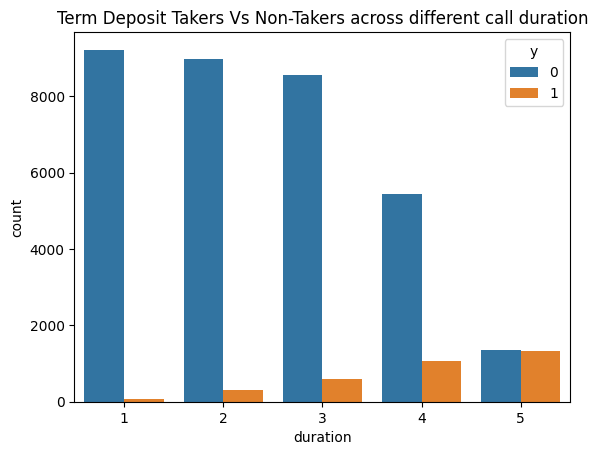

In [199]:
sns.countplot(data=curr_camp, x = 'duration', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across different call duration")

# Inference is that the longer the call duration, better is the conversion ratio in terms of Term Deposit acceptance

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across different months')]

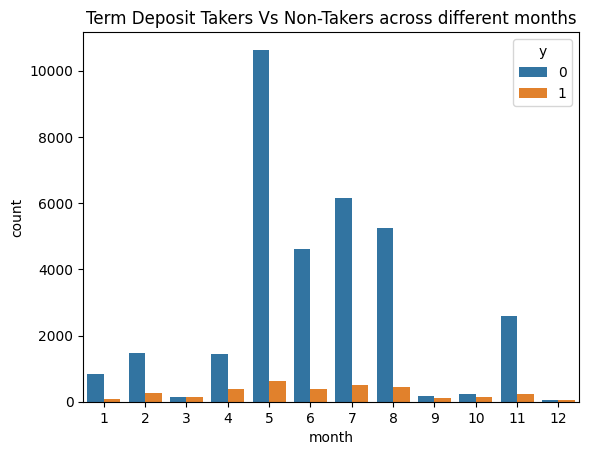

In [25]:
sns.countplot(data=curr_camp, x = 'month', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across different months")

# Months - June, July, Aug, Sep and October seem to be a better month to target Term Deposit takers since the conversion ratio is much better in these months

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across defaultors vs non=defaultors')]

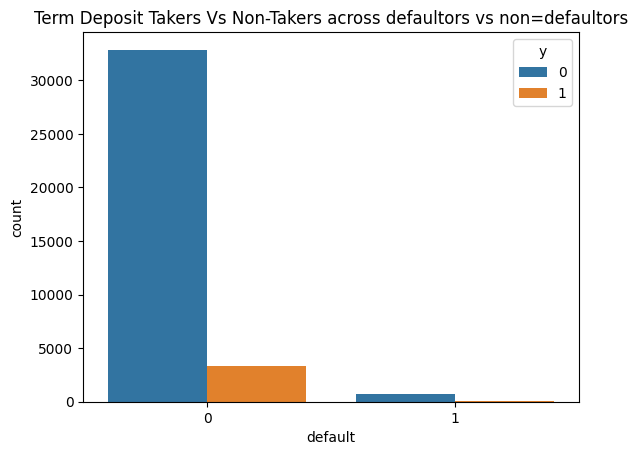

In [26]:
sns.countplot(data=curr_camp, x = 'default', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across defaultors vs non=defaultors")

# As can be clearly seen, defaultors are not the target audience for Term Deposits

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers based on housing loan ')]

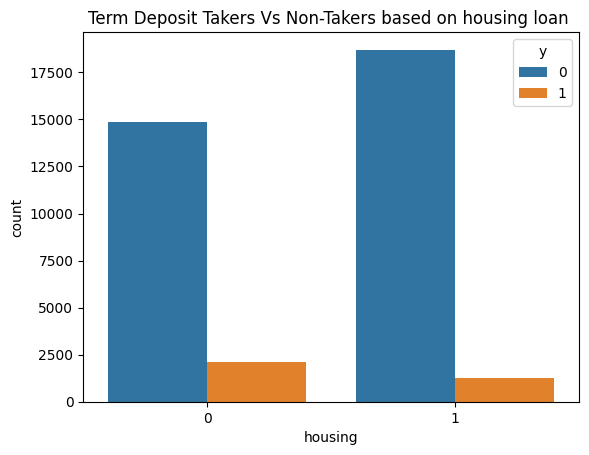

In [27]:
sns.countplot(data=curr_camp, x = 'housing', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers based on housing loan ")

# As as percentage, customers who do not have housing loan tend to opt for Term deposits compared to their counterparts

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers based on personal loan')]

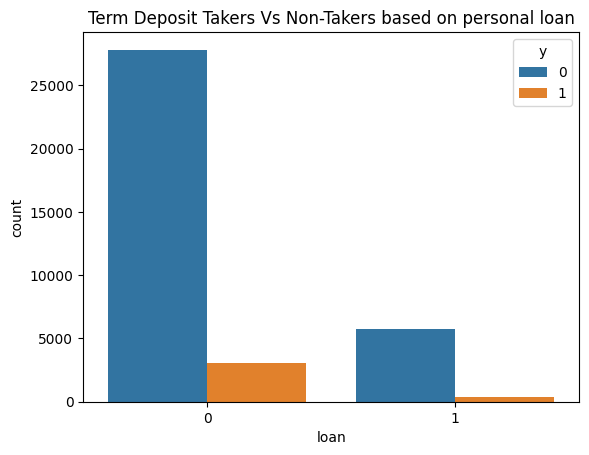

In [ ]:
sns.countplot(data=curr_camp, x = 'loan', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers based on personal loan")

# As as percentage, customers who do not have personal loan tend to opt for Term deposits compared to their counterparts

In [158]:
# From Figure 1 we understand that there is class imbalance in output variable

curr_camp['y'].value_counts()

0    33570
1     3384
Name: y, dtype: int64

In [159]:
Y = curr_camp['y']
X = curr_camp.drop(['y'], axis =1)

In [ ]:
# Attempting Machine Learning Algorithms without oversampling to check the model performance and Metrics

In [160]:
rs = RobustScaler()
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(29563, 25)
(7391, 25)
(29563,)
(7391,)


In [161]:
X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)

In [162]:
# Naive Baye's Model

model = GaussianNB()
model.fit(X_train,Y_train)
pred = model.predict(X_test)

In [163]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6729
           1       0.00      0.00      0.00       662

    accuracy                           0.91      7391
   macro avg       0.46      0.50      0.48      7391
weighted avg       0.83      0.91      0.87      7391



# As Expected since there is very high Class Imbalance, algorithm is not able to predict the result as seen in the classification report above

In [ ]:
# Applying SMOTE Technique to attain Balanced Class

In [164]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
X_new, Y_new = sm.fit_resample(X,Y)

In [165]:
Y_new.value_counts()  # Class Balance Reached

0    33570
1    33570
Name: y, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new,Y_new,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53712, 25)
(13428, 25)
(53712,)
(13428,)


In [181]:
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [168]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.83      0.63      6769
           1       0.52      0.18      0.27      6659

    accuracy                           0.51     13428
   macro avg       0.51      0.51      0.45     13428
weighted avg       0.51      0.51      0.45     13428



### We can see that Naive Baye's is not yielding good test results, hence proceeding with other ML models

# Applying Decision tree Alogrithm with different Depths

In [40]:
# Decision tree with depth 4

model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(X_train,Y_train)

Y_pred_4=model_dt_4.predict(X_test)  # Using the original X train and X test (with imbalanced class data)
accuracy_score(Y_test,Y_pred_4)

0.9096198078744419

In [41]:
# Decision tree with depth 6

model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(X_train,Y_train)

Y_pred_6=model_dt_6.predict(X_test)    # Using the original X train and X test (with imbalanced class data)
accuracy_score(Y_test,Y_pred_6)

0.9075903125422812

In [42]:
# # Decision tree with depth 4 and entropy

model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_ent.fit(X_train,Y_train)

Y_pred_ent=model_dt_ent.predict(X_test)    # Using the original X train and X test (with imbalanced class data)
accuracy_score(Y_test,Y_pred_ent)

0.9097551075632526

In [43]:
# # Decision tree with depth 6 and entropy

model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=6,criterion='entropy')
model_dt_ent.fit(X_train,Y_train)

Y_pred_ent=model_dt_ent.predict(X_test)     # Using the original X train and X test (with imbalanced class data)
accuracy_score(Y_test,Y_pred_ent)

0.9089433094303883

In [44]:
print(classification_report(Y_test,Y_pred_ent))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6729
           1       0.48      0.25      0.33       662

    accuracy                           0.91      7391
   macro avg       0.71      0.61      0.64      7391
weighted avg       0.89      0.91      0.90      7391



In [182]:
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)    # Using the Revised X train and X test (with Balanced class, oversampled  data)

y_pred_4=model_dt_4.predict(x_test)
accuracy_score(y_test,y_pred_4)

0.8065236818588025

In [183]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      6769
           1       0.79      0.83      0.81      6659

    accuracy                           0.81     13428
   macro avg       0.81      0.81      0.81     13428
weighted avg       0.81      0.81      0.81     13428



In [184]:

model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_ent.fit(x_train,y_train)
y_pred_ent=model_dt_ent.predict(x_test)      # Using the revised x train and x test (with Balanced class, oversampled  data)
accuracy_score(y_test,y_pred_ent)

0.8054810843014596

In [185]:
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6769
           1       0.79      0.83      0.81      6659

    accuracy                           0.81     13428
   macro avg       0.81      0.81      0.81     13428
weighted avg       0.81      0.81      0.81     13428



### We can see that Decision tree model is giving good test results, however proceeding with other ML models as well

# Applying Random Forest Classifier

In [186]:
fit_rf=RandomForestClassifier(random_state=10)

In [174]:
param_dist={'max_depth':[4,6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy']}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(X_train,Y_train)   # Original X train and X test (with imbalanced class data)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [175]:
cv_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

In [176]:
Y_pred=cv_rf.predict(X_test)
accuracy_rf = accuracy_score(Y_test,Y_pred)  # Original X train and X test (with imbalanced class data)
accuracy_rf

0.9112434041401705

In [177]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6729
           1       0.52      0.14      0.22       662

    accuracy                           0.91      7391
   macro avg       0.72      0.56      0.59      7391
weighted avg       0.88      0.91      0.89      7391



In [187]:
param_dist={'max_depth':[6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy']}


In [188]:
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [189]:
y_pred=cv_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred)  # Using the revised x train and x test (with balanced class data)
print(accuracy_rf)
print(classification_report(y_test,y_pred))

0.8913464402740542
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      6769
           1       0.87      0.92      0.89      6659

    accuracy                           0.89     13428
   macro avg       0.89      0.89      0.89     13428
weighted avg       0.89      0.89      0.89     13428



# ## Thus, The Random Forest Model gives the best performance with comparatively better metrics than other models.  

 ##  **Proceeding to the previous campaign participants**

In [190]:
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,882,0,0,21,10,39,1,151,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,-247,1,1,21,10,519,1,166,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,3444,1,0,21,10,144,1,91,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,2415,1,0,22,10,73,1,86,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,0,1,0,23,10,140,1,143,...,0,0,0,0,0,1,0,0,1,0


# EDA for previous Campaign Participants

<Axes: ylabel='balance'>

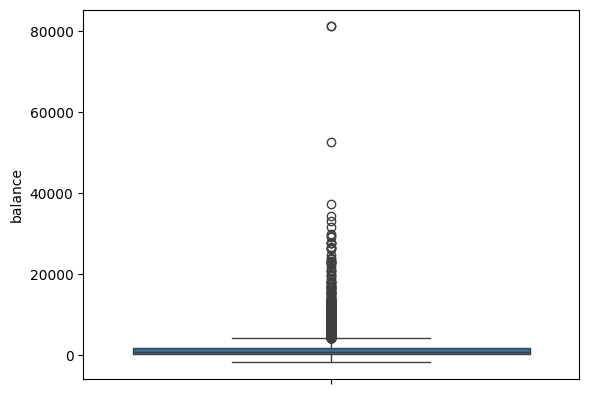

In [102]:
sns.boxplot(data = prev_camp, y = prev_camp['balance'])

In [60]:
## Understanding the outliers in terms of their Bank Balance

Q1 = prev_camp['balance'].quantile(0.25)
Q3 = prev_camp['balance'].quantile(0.75)

IQR = Q3 - Q1

Lower_Limit = Q1 -1.5*IQR
Upper_Limit = Q3 +1.5*IQR

print(f"Q1 is {Q1}, Q3 is {Q3}, Lower_Limit is {Lower_Limit}, Upper_Limit is {Upper_Limit}")

Q1 is 168.0, Q3 is 1743.0, Lower_Limit is -2194.5, Upper_Limit is 4105.5


In [62]:
Outlier_count = prev_camp[prev_camp['balance']>4105.5].shape[0]

Outlier_perc = Outlier_count/len(prev_camp)

print(f'Outlier_count is {Outlier_count} |  Outlier_perc is {Outlier_perc*100}%')

Outlier_count is 806 |  Outlier_perc is 9.761414557345283%


In [191]:
prev_camp['balance'] = pd.cut(prev_camp['balance'], bins =[-1884,168,602,1743,4105.5,81204],
                              labels=['Very Low Balance','Low_Balance','Moderate_Balance','High_Balance','Very_High_Balance'])
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,Moderate_Balance,0,0,21,10,39,1,151,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,Very Low Balance,1,1,21,10,519,1,166,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,High_Balance,1,0,21,10,144,1,91,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,High_Balance,1,0,22,10,73,1,86,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,Very Low Balance,1,0,23,10,140,1,143,...,0,0,0,0,0,1,0,0,1,0


In [192]:
prev_camp['balance'] = prev_camp['balance'].map({'Very_High_Balance': 5, 'High_Balance':4,'Moderate_Balance':3,'Low_Balance':2,'Very Low Balance':1})
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,3,0,0,21,10,39,1,151,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,1,1,1,21,10,519,1,166,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,4,1,0,21,10,144,1,91,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,4,1,0,22,10,73,1,86,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,1,1,0,23,10,140,1,143,...,0,0,0,0,0,1,0,0,1,0


<Axes: ylabel='duration'>

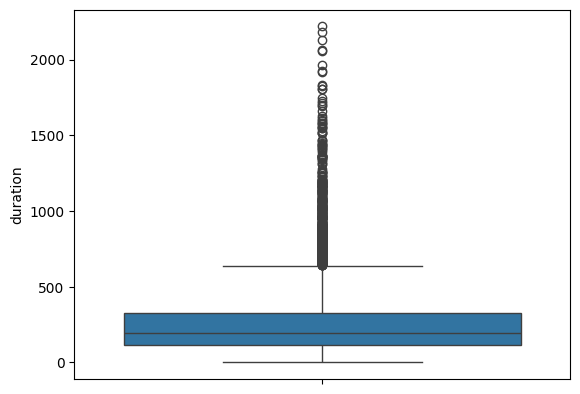

In [66]:
sns.boxplot(data = prev_camp, y = prev_camp['duration'])

In [70]:
# Understanding the outliers in terms of their Duration of last call

Q1 = prev_camp['duration'].quantile(0.25)
Q3 = prev_camp['duration'].quantile(0.75)

IQR = Q3 - Q1

Lower_Limit = Q1 -1.5*IQR
Upper_Limit = Q3 +1.5*IQR

print(f"Q1 is {Q1}, Q3 is {Q3}, Lower_Limit is {Lower_Limit}, Upper_Limit is {Upper_Limit}")

Q1 is 113.0, Q3 is 324.0, Lower_Limit is -203.5, Upper_Limit is 640.5


In [72]:
Outlier_count = prev_camp[prev_camp['duration']>640.5].shape[0]

Outlier_perc = Outlier_count/len(prev_camp)

print(f'Outlier_count is {Outlier_count} |  Outlier_perc is {Outlier_perc*100}%')

Outlier_count is 533 |  Outlier_perc is 6.455128981470268%


In [193]:
prev_camp['duration'] = pd.cut(prev_camp['duration'], bins =[1,113,193,324,640.5,2219],labels=['Very_short_call','Short_Call','Normal_Call','Fairly_long_Call','Very_long_Call'])
prev_camp['duration'] = prev_camp['duration'].map({'Very_long_Call':5, 'Fairly_long_Call':4,'Normal_Call':3,'Short_Call':2, 'Very_short_call':1})
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,3,0,0,21,10,1,1,151,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,1,1,1,21,10,4,1,166,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,4,1,0,21,10,2,1,91,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,4,1,0,22,10,1,1,86,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,1,1,0,23,10,2,1,143,...,0,0,0,0,0,1,0,0,1,0


<Axes: ylabel='pdays'>

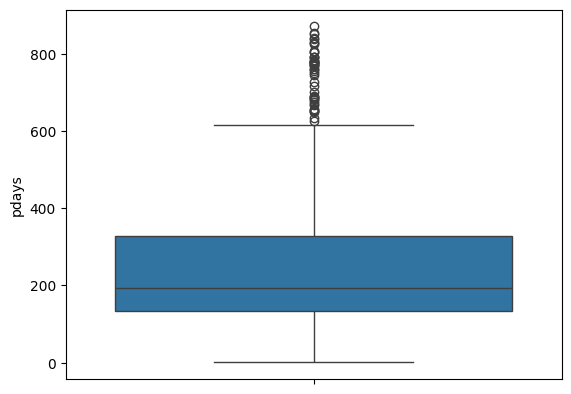

In [74]:
sns.boxplot(data = prev_camp, y = prev_camp['pdays'])

In [75]:
# Understanding the outliers in terms of their Duration of last call

Q1 = prev_camp['pdays'].quantile(0.25)
Q3 = prev_camp['pdays'].quantile(0.75)

IQR = Q3 - Q1

Lower_Limit = Q1 -1.5*IQR
Upper_Limit = Q3 +1.5*IQR

print(f"Q1 is {Q1}, Q3 is {Q3}, Lower_Limit is {Lower_Limit}, Upper_Limit is {Upper_Limit}")

Q1 is 133.0, Q3 is 327.0, Lower_Limit is -158.0, Upper_Limit is 618.0


In [106]:
Outlier_count = prev_camp[prev_camp['pdays']>618].shape[0]

Outlier_perc = Outlier_count/len(prev_camp)

print(f'Outlier_count is {Outlier_count} |  Outlier_perc is {Outlier_perc*100}%')

Outlier_count is 49 |  Outlier_perc is 0.5934358725929514%


In [194]:
prev_camp['pdays'] = pd.cut(prev_camp['pdays'], bins =[1,133,194,327,618,871],labels=['Very_Recent_Call','Recent_call','Normal_Call','Long_Back','Very_Long_Back'])
prev_camp['pdays'] = prev_camp['pdays'].map({'Very_Long_Back':5, 'Long_Back':4,'Normal_Call':3,'Recent_call':2, 'Very_Recent_Call':1})
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,3,0,0,21,10,1,1,2,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,1,1,1,21,10,4,1,2,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,4,1,0,21,10,2,1,1,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,4,1,0,22,10,1,1,1,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,1,1,0,23,10,2,1,2,...,0,0,0,0,0,1,0,0,1,0


<Axes: ylabel='previous'>

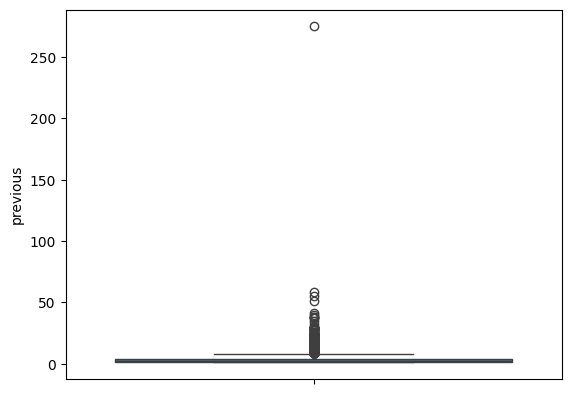

In [109]:
sns.boxplot(data = prev_camp, y = prev_camp['previous'])

In [110]:
# Understanding the outliers in terms of their previously contacted times

Q1 = prev_camp['previous'].quantile(0.25)
Q3 = prev_camp['previous'].quantile(0.75)

IQR = Q3 - Q1

Lower_Limit = Q1 -1.5*IQR
Upper_Limit = Q3 +1.5*IQR

print(f"Q1 is {Q1}, Q3 is {Q3}, Lower_Limit is {Lower_Limit}, Upper_Limit is {Upper_Limit}")

Q1 is 1.0, Q3 is 4.0, Lower_Limit is -3.5, Upper_Limit is 8.5


In [111]:
Outlier_count = prev_camp[prev_camp['previous']>8.5].shape[0]

Outlier_perc = Outlier_count/len(prev_camp)

print(f'Outlier_count is {Outlier_count} |  Outlier_perc is {Outlier_perc*100}%')

Outlier_count is 453 |  Outlier_perc is 5.486254087440959%


In [195]:
prev_camp['previous'] = pd.cut(prev_camp['previous'], bins =[1,2,4,8.5,275],labels=['Limited_calls','Normal','Freq','V.Freq'])
prev_camp['previous'] = prev_camp['previous'].map({'V.Freq':4, 'Freq':3,'Normal':2,'Limited_calls':1})
prev_camp.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
24060,33,0,3,0,0,21,10,1,1,2,...,0,0,0,0,0,1,0,0,1,0
24062,42,0,1,1,1,21,10,4,1,2,...,0,0,0,0,0,0,1,1,0,0
24064,33,0,4,1,0,21,10,2,1,1,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,4,1,0,22,10,1,1,1,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,1,1,0,23,10,2,1,2,...,0,0,0,0,0,1,0,0,1,0


## Performing EDA on the dataset

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across different yearly balance holders')]

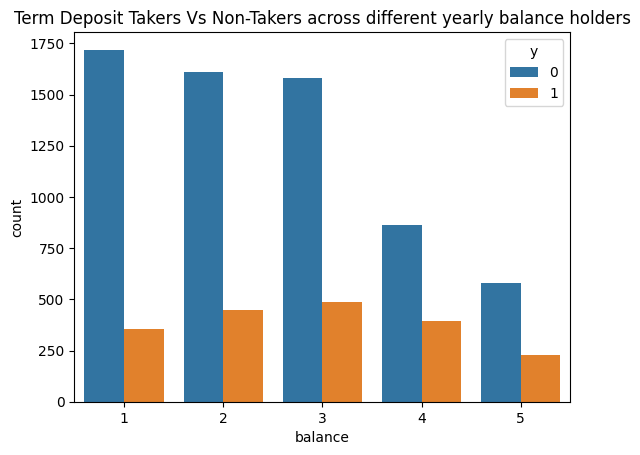

In [196]:
sns.countplot(data=prev_camp, x = 'balance', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across different yearly balance holders")

# We can clearly see that as a percentage, people having very high or high bank balance are opting for the Term Deposit

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across different call duration')]

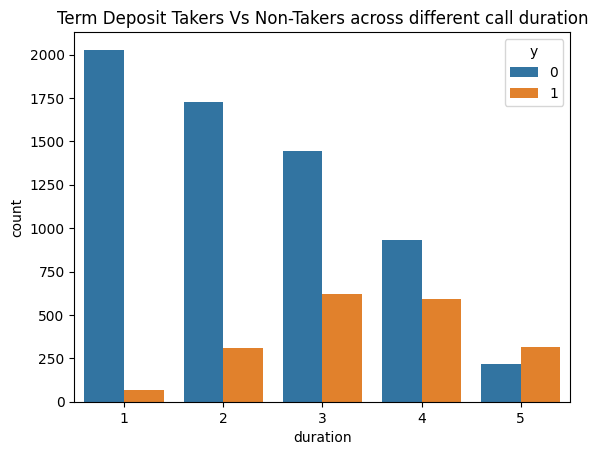

In [198]:
sns.countplot(data=prev_camp, x = 'duration', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across different call duration")

# People who have spoken for longer duration over calls have subscribed to Term Deposits

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across defaultors vs non=defaultors')]

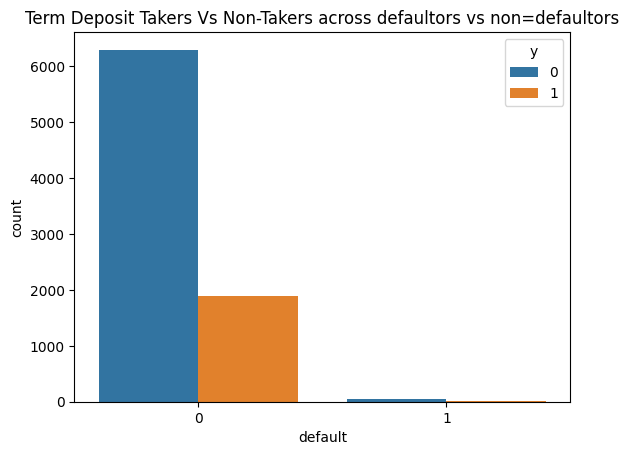

In [200]:
sns.countplot(data=prev_camp, x = 'default', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across defaultors vs non=defaultors")

# Surprisingly, a lot of defaultors have also opted for Term Deposit, which indicates, previous loan defaults may not be a reason for people to start Term Deposit

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers across different months')]

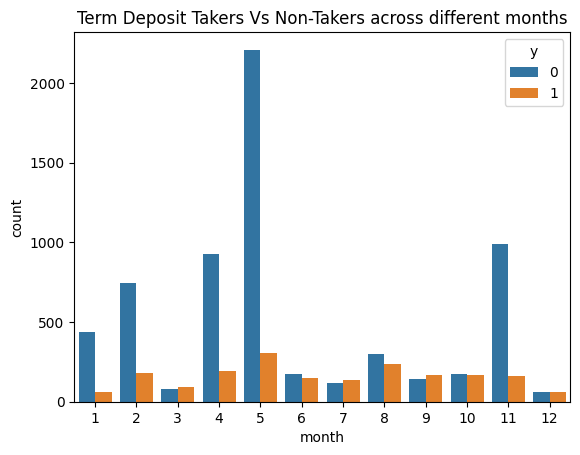

In [201]:
sns.countplot(data=prev_camp, x = 'month', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers across different months")

# As a percentage, People opting for Term Deposits are either equal to or greater than the number of Non subscribers specifically in the months from June to Oct

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers based on housing loan ')]

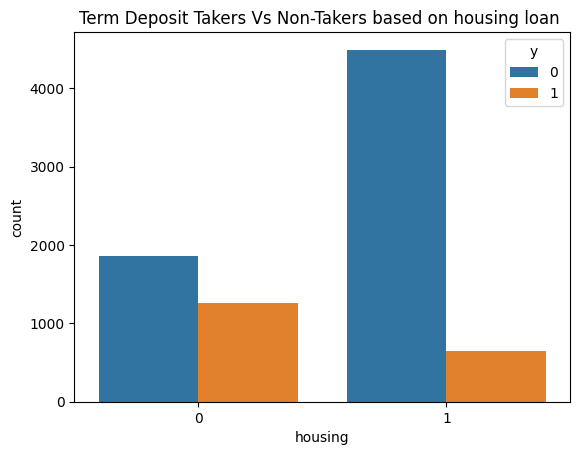

In [202]:
sns.countplot(data=prev_camp, x = 'housing', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers based on housing loan ")

# People who do not have housing loan tend to opt for Term Deposits since the same earns interest, whereas home loan owners are not so keen to avail Term Deposits

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers based on personal loan')]

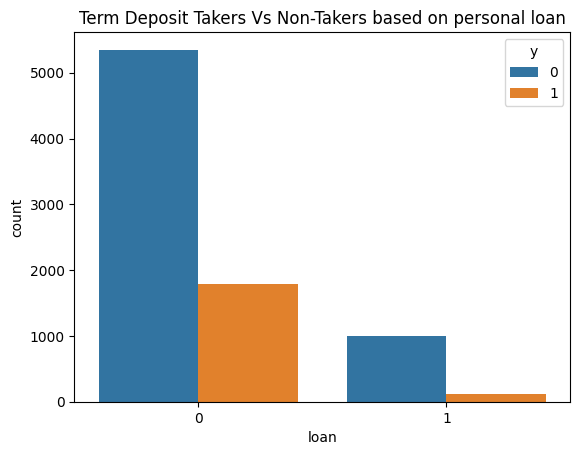

In [203]:
sns.countplot(data=prev_camp, x = 'loan', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers based on personal loan")

# Around 25% of Non loan customers are interested in taking Term Deposits, whereas only 10% of borrowers (personal loan) are opting for Term Deposits

[Text(0.5, 1.0, 'Term Deposit Takers Vs Non-Takers based on pdays')]

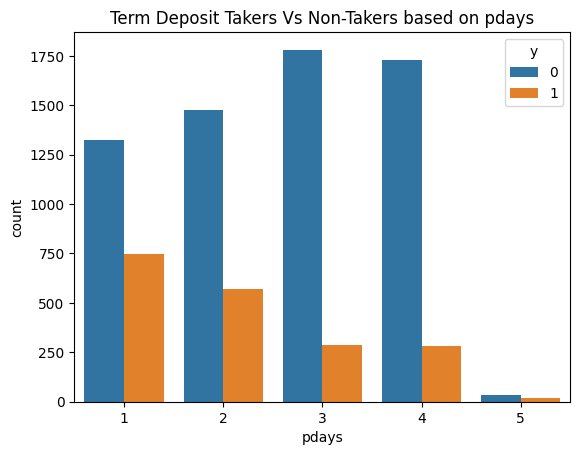

In [207]:
sns.countplot(data=prev_camp, x = 'pdays', hue = 'y').set(title="Term Deposit Takers Vs Non-Takers based on pdays")


# People who were recently contacted are actively showing interest in taking Term Deposits

## Attempting Machine Learning Algorithms without oversampling to check the model performance and Metrics

In [208]:
prev_camp['poutcome'].value_counts()

failure    4901
other      1840
success    1511
unknown       5
Name: poutcome, dtype: int64

### Certain Asumptions made as follows:-

1) Since unknown is not clear, we drop them.
2) We make 2 models, considering model 1 where **other as failure** since there is no clarity on it and  model 2 where we drop other along with unknown

In [225]:
# (Model 1) Dropping Unknown and taking other as failure

prev_camp = prev_camp.drop(prev_camp[prev_camp['poutcome'] == 'unknown'].index)

prev_camp_1 = prev_camp.replace(to_replace = 'other', value = 'failure')
prev_camp_1['poutcome'].value_counts()


failure    6741
success    1511
Name: poutcome, dtype: int64

In [227]:
# (Model 2) Dropping other as there is no information about it

prev_camp_2 = prev_camp.drop(prev_camp[prev_camp['poutcome']=='other'].index)
prev_camp_2['poutcome'].value_counts()

failure    4901
success    1511
Name: poutcome, dtype: int64

In [226]:
# Converting Poutcome to category and machine readable form in model 1

prev_camp_1['poutcome'] = prev_camp_1['poutcome'].astype('category')
prev_camp_1['poutcome'] = prev_camp_1['poutcome'].map({'failure': 0, 'success': 1})
prev_camp_1['poutcome'].value_counts()

0    6741
1    1511
Name: poutcome, dtype: int64

In [228]:
# Converting Poutcome to category and machine readable form in model 2

prev_camp_2['poutcome'] = prev_camp_2['poutcome'].astype('category')
prev_camp_2['poutcome'] = prev_camp_2['poutcome'].map({'failure': 0, 'success': 1})
prev_camp_2['poutcome'].value_counts()

0    4901
1    1511
Name: poutcome, dtype: int64

# Attempting Decision Tree Algorithm

In [229]:
# Starting by Oversampling the data to avoid Class imbalance in output

# The below ML models are for Model 1

Y = prev_camp_1['y']
X = prev_camp_1.drop(['y'], axis =1)

Y.value_counts()

0    6349
1    1903
Name: y, dtype: int64

In [230]:
rs = RobustScaler()
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)

(6601, 28)
(1651, 28)
(6601,)
(1651,)


In [231]:
sm=SMOTE(random_state=11)   # Over sampling to avoid Class imbalance in output
X_new, Y_new = sm.fit_resample(X,Y)
Y_new.value_counts()

0    6349
1    6349
Name: y, dtype: int64

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X_new,Y_new,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10158, 28)
(2540, 28)
(10158,)
(2540,)


In [233]:
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [234]:
# Decision Tree with maximum 4 depth

model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)    # Using the Revised X train and X test (with Balanced class, oversampled  data)

y_pred_4=model_dt_4.predict(x_test)
accuracy_score(y_test,y_pred_4)

0.7929133858267716

In [235]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1305
           1       0.78      0.81      0.79      1235

    accuracy                           0.79      2540
   macro avg       0.79      0.79      0.79      2540
weighted avg       0.79      0.79      0.79      2540



In [236]:
model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')  # Using Entropy method as criterion
model_dt_ent.fit(x_train,y_train)
y_pred_ent=model_dt_ent.predict(x_test)      # Using the revised x train and x test (with Balanced class, oversampled  data)
accuracy_score(y_test,y_pred_ent)

0.7885826771653544

In [237]:
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1305
           1       0.78      0.79      0.79      1235

    accuracy                           0.79      2540
   macro avg       0.79      0.79      0.79      2540
weighted avg       0.79      0.79      0.79      2540



### So going with Gini was better looking at the performance metrics in decision tree

# Applying Random Forest Classifier

In [246]:
fit_rf=RandomForestClassifier(random_state=10)

param_dist={'max_depth':[6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy']}

In [247]:
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [248]:
y_pred=cv_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred)  # Using the revised x train and x test (with balanced class data)
print(accuracy_rf)
print(classification_report(y_test,y_pred))

0.8578740157480315
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1305
           1       0.83      0.89      0.86      1235

    accuracy                           0.86      2540
   macro avg       0.86      0.86      0.86      2540
weighted avg       0.86      0.86      0.86      2540



# ## Thus, The Random Forest Model gives the best performance with comparatively better metrics than other models.  

In [249]:
# The below ML algorithms are for Model 2

Y = prev_camp_2['y']
X = prev_camp_2.drop(['y'], axis =1)

In [250]:
rs = RobustScaler()
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)

(5129, 28)
(1283, 28)
(5129,)
(1283,)


In [251]:
sm=SMOTE(random_state=11)   # Over sampling to avoid Class imbalance in output
X_new, Y_new = sm.fit_resample(X,Y)
Y_new.value_counts()

0    4816
1    4816
Name: y, dtype: int64

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X_new,Y_new,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7705, 28)
(1927, 28)
(7705,)
(1927,)


In [254]:
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

# Applying Decision Tree

In [255]:
#  Decision Tree with maximum 4 depth

model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)    # Using the Revised X train and X test (with Balanced class, oversampled  data)

y_pred_4=model_dt_4.predict(x_test)
accuracy_score(y_test,y_pred_4)

0.7877529839128179

In [256]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       989
           1       0.76      0.82      0.79       938

    accuracy                           0.79      1927
   macro avg       0.79      0.79      0.79      1927
weighted avg       0.79      0.79      0.79      1927



In [257]:
model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_ent.fit(x_train,y_train)
y_pred_ent=model_dt_ent.predict(x_test)      # Using the revised x train and x test (with Balanced class, oversampled  data)
accuracy_score(y_test,y_pred_ent)

0.7877529839128179

In [258]:
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       989
           1       0.76      0.82      0.79       938

    accuracy                           0.79      1927
   macro avg       0.79      0.79      0.79      1927
weighted avg       0.79      0.79      0.79      1927



## Applying Random Forest Classifier

In [259]:
fit_rf=RandomForestClassifier(random_state=10)

param_dist={'max_depth':[6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy']}

In [260]:
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [261]:
y_pred=cv_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred)  # Using the revised x train and x test (with balanced class data)
print(accuracy_rf)
print(classification_report(y_test,y_pred))

0.8609237156201349
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       989
           1       0.83      0.90      0.86       938

    accuracy                           0.86      1927
   macro avg       0.86      0.86      0.86      1927
weighted avg       0.86      0.86      0.86      1927



# We thereby conclude that Random Forest is the best type of Classifier across all cases in this dataset with around 90% accuracy.